In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg



array([[-5.57170269e-01, -1.78961483e+00],
       [-8.12219396e-01, -1.59904260e+00],
       [-4.19076709e-01,  2.31613960e+00],
       [-9.69031665e-01,  1.95483848e-01],
       [ 5.26350320e-01,  7.79203744e-03],
       [ 5.39069481e-01,  2.77263481e-01],
       [ 1.05386576e+00,  4.10997447e-01],
       [ 4.65768690e-01,  1.38529048e+00],
       [-8.77611239e-01,  7.17617042e-01],
       [-1.11163523e+00, -2.89188039e-01],
       [-4.36532429e-01, -2.89733281e+00],
       [-3.60168449e-01,  2.22463495e-01],
       [-1.18432639e+00, -3.31601711e-01],
       [-1.54358166e+00, -1.76723656e+00],
       [ 1.27175116e+00,  5.22652366e-02],
       [ 1.92400587e+00,  1.36384186e+00],
       [ 8.53728841e-01, -1.93314886e+00],
       [-1.42295671e+00, -1.15692643e-01],
       [-6.31763809e-02, -7.41504372e-01],
       [-1.57476730e+00,  1.44324905e+00],
       [ 5.63186938e-01, -2.43856256e-03],
       [ 3.13285636e-02, -5.51943253e-02],
       [-4.77655583e-01, -5.59042617e-02],
       [ 7.

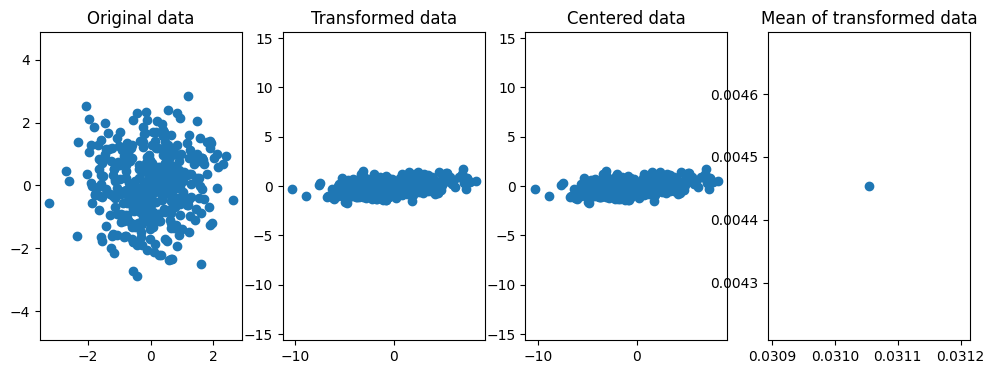

In [2]:
rng = np.random.default_rng(seed=19800210)

n = 400
X = rng.standard_normal((n, 2))

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(141)
# col1 = X[:, 0]
# col2 = X[:, 1]
# print('le form de col1:', col1.shape)
ax.scatter(X[:, 0], X[:, 1])
ax.axis('equal')
ax.set_title('Original data')

A = np.array([[3,1.2],[0,0.6]])
X_transformed = X @ A.T
ax = fig.add_subplot(142)
ax.scatter(X_transformed[:, 0], X_transformed[:, 1])
ax.axis('equal')
ax.set_title('Transformed data')
# plt.show()

X_transformed_mean = X_transformed.mean(axis=0, keepdims=True)
X_centered = X_transformed - X_transformed_mean
ax = fig.add_subplot(143)
ax.scatter(X_centered[:, 0], X_centered[:, 1])
ax.axis('equal')
ax.set_title('Centered data')

ax = fig.add_subplot(144)
ax.scatter(X_transformed_mean[:, 0], X_transformed_mean[:, 1])
ax.axis('equal')
ax.set_title('Mean of transformed data')
# plt.show()
X



In [3]:
U, S, VT = linalg.svd(X_centered, full_matrices=False)
print("Shapes of U, S, VT:", U.shape, S.shape, VT.shape)

pc1 = VT[0]
pc2 = VT[1]

S, pc1, pc2

Shapes of U, S, VT: (400, 2) (2,) (2, 2)


(array([65.58993061, 11.116104  ]),
 array([0.99676645, 0.0803533 ]),
 array([-0.0803533 ,  0.99676645]))

In [4]:
# 对中心化数据：

# 协方差矩阵 C = (X^T X)/(n-1)

# 其特征值 = (S^2)/(n-1)
eigvals = (S**2) / (n - 1)
explained_ratio = eigvals / eigvals.sum()
eigvals, explained_ratio


(array([10.78205262,  0.30969365]), array([0.97207891, 0.02792109]))

In [5]:
# 投影到 pc1
z1 = X_centered @ pc1  # (n,)

# 从 1D 重构回 2D（只保留第一主成分）
X_recon_1d = np.outer(z1, pc1)

# 重构误差（MSE）
mse_1d = np.mean((X_centered - X_recon_1d)**2)
mse_1d


np.float64(0.15445971006146617)

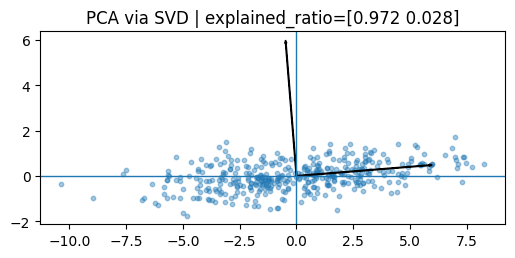

In [6]:
plt.figure(figsize=(6,6))
plt.scatter(X_centered[:,0], X_centered[:,1], s=10, alpha=0.4)

# 画主方向向量（缩放一下方便看）
scale = 6.0
origin = np.array([0.0, 0.0])
plt.arrow(origin[0], origin[1], pc1[0]*scale, pc1[1]*scale, width=0.03, length_includes_head=True)
plt.arrow(origin[0], origin[1], pc2[0]*scale, pc2[1]*scale, width=0.03, length_includes_head=True)

plt.axhline(0, linewidth=1)
plt.axvline(0, linewidth=1)
plt.title(f"PCA via SVD | explained_ratio={explained_ratio.round(3)}")
plt.gca().set_aspect("equal", "box")
plt.show()


In [7]:
C = (X_centered.T @ X_centered) / (n - 1)     # 2x2
w, V = linalg.eigh(C)                          # 对称矩阵用 eigh

# eigh 返回从小到大排序，翻转一下
w = w[::-1]
V = V[:, ::-1]

w, V


(array([10.78205262,  0.30969365]),
 array([[-0.99676645,  0.0803533 ],
        [-0.0803533 , -0.99676645]]))